In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [2]:
df=pd.read_csv("data1.csv")

In [3]:
df.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df=df[['age','bp','sg','al','su','rbc','pc','pcc','ba','appet','pe','ane','classification']]

In [5]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
1596,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
1597,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd
1598,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,good,no,no,notckd


In [6]:
df=df.replace(to_replace=["ckd"],
           value=0)
df=df.replace(to_replace=["notckd"],
           value=1)
df=df.replace(to_replace=["ckd\t"],
           value=0) 

In [7]:
df=df.replace(to_replace=["normal","notpresent","good","no"],
           value=0)
df=df.replace(to_replace=["abnormal","present","poor","yes"],
           value=1)

In [8]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1596,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1597,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1598,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1564 non-null   float64
 1   bp              1552 non-null   float64
 2   sg              1412 non-null   float64
 3   al              1416 non-null   float64
 4   su              1404 non-null   float64
 5   rbc             992 non-null    float64
 6   pc              1340 non-null   float64
 7   pcc             1584 non-null   float64
 8   ba              1584 non-null   float64
 9   appet           1596 non-null   float64
 10  pe              1596 non-null   float64
 11  ane             1596 non-null   float64
 12  classification  1600 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 162.6 KB


In [10]:
df.isna().sum()

age                36
bp                 48
sg                188
al                184
su                196
rbc               608
pc                260
pcc                16
ba                 16
appet               4
pe                  4
ane                 4
classification      0
dtype: int64

In [11]:
df['age']=df['age'].fillna(df['age'].mean())
df['bp']=df['bp'].fillna(df['bp'].mean())
df['sg']=df['sg'].fillna(df['sg'].mean())
df['al']=df['al'].fillna(df['al'].mean())
df['su']=df['su'].fillna(df['su'].mean())
df['rbc']=df['rbc'].fillna(df['rbc'].mean())
df['pc']=df['pc'].fillna(df['pc'].mean())
df['pcc']=df['pcc'].fillna(df['pcc'].mean())
df['ba']=df['ba'].fillna(df['ba'].mean())
df['appet']=df['appet'].fillna(df['appet'].mean())
df['pe']=df['pe'].fillna(df['pe'].mean())
df['ane']=df['ane'].fillna(df['ane'].mean())

In [12]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,0.205514,0.190476,0.150376,0.375000
std,16.959035,13.463650,0.005364,1.271124,1.028521,0.308693,0.383389,0.306468,0.227984,0.403697,0.392308,0.357104,0.484274
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,0.189516,0.226866,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

<Axes: >

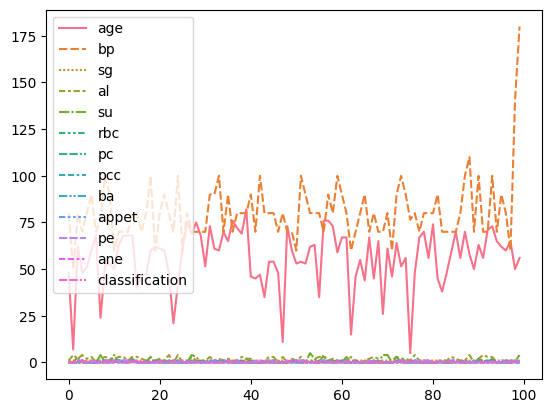

In [15]:
sns.lineplot(data=df.head(100))

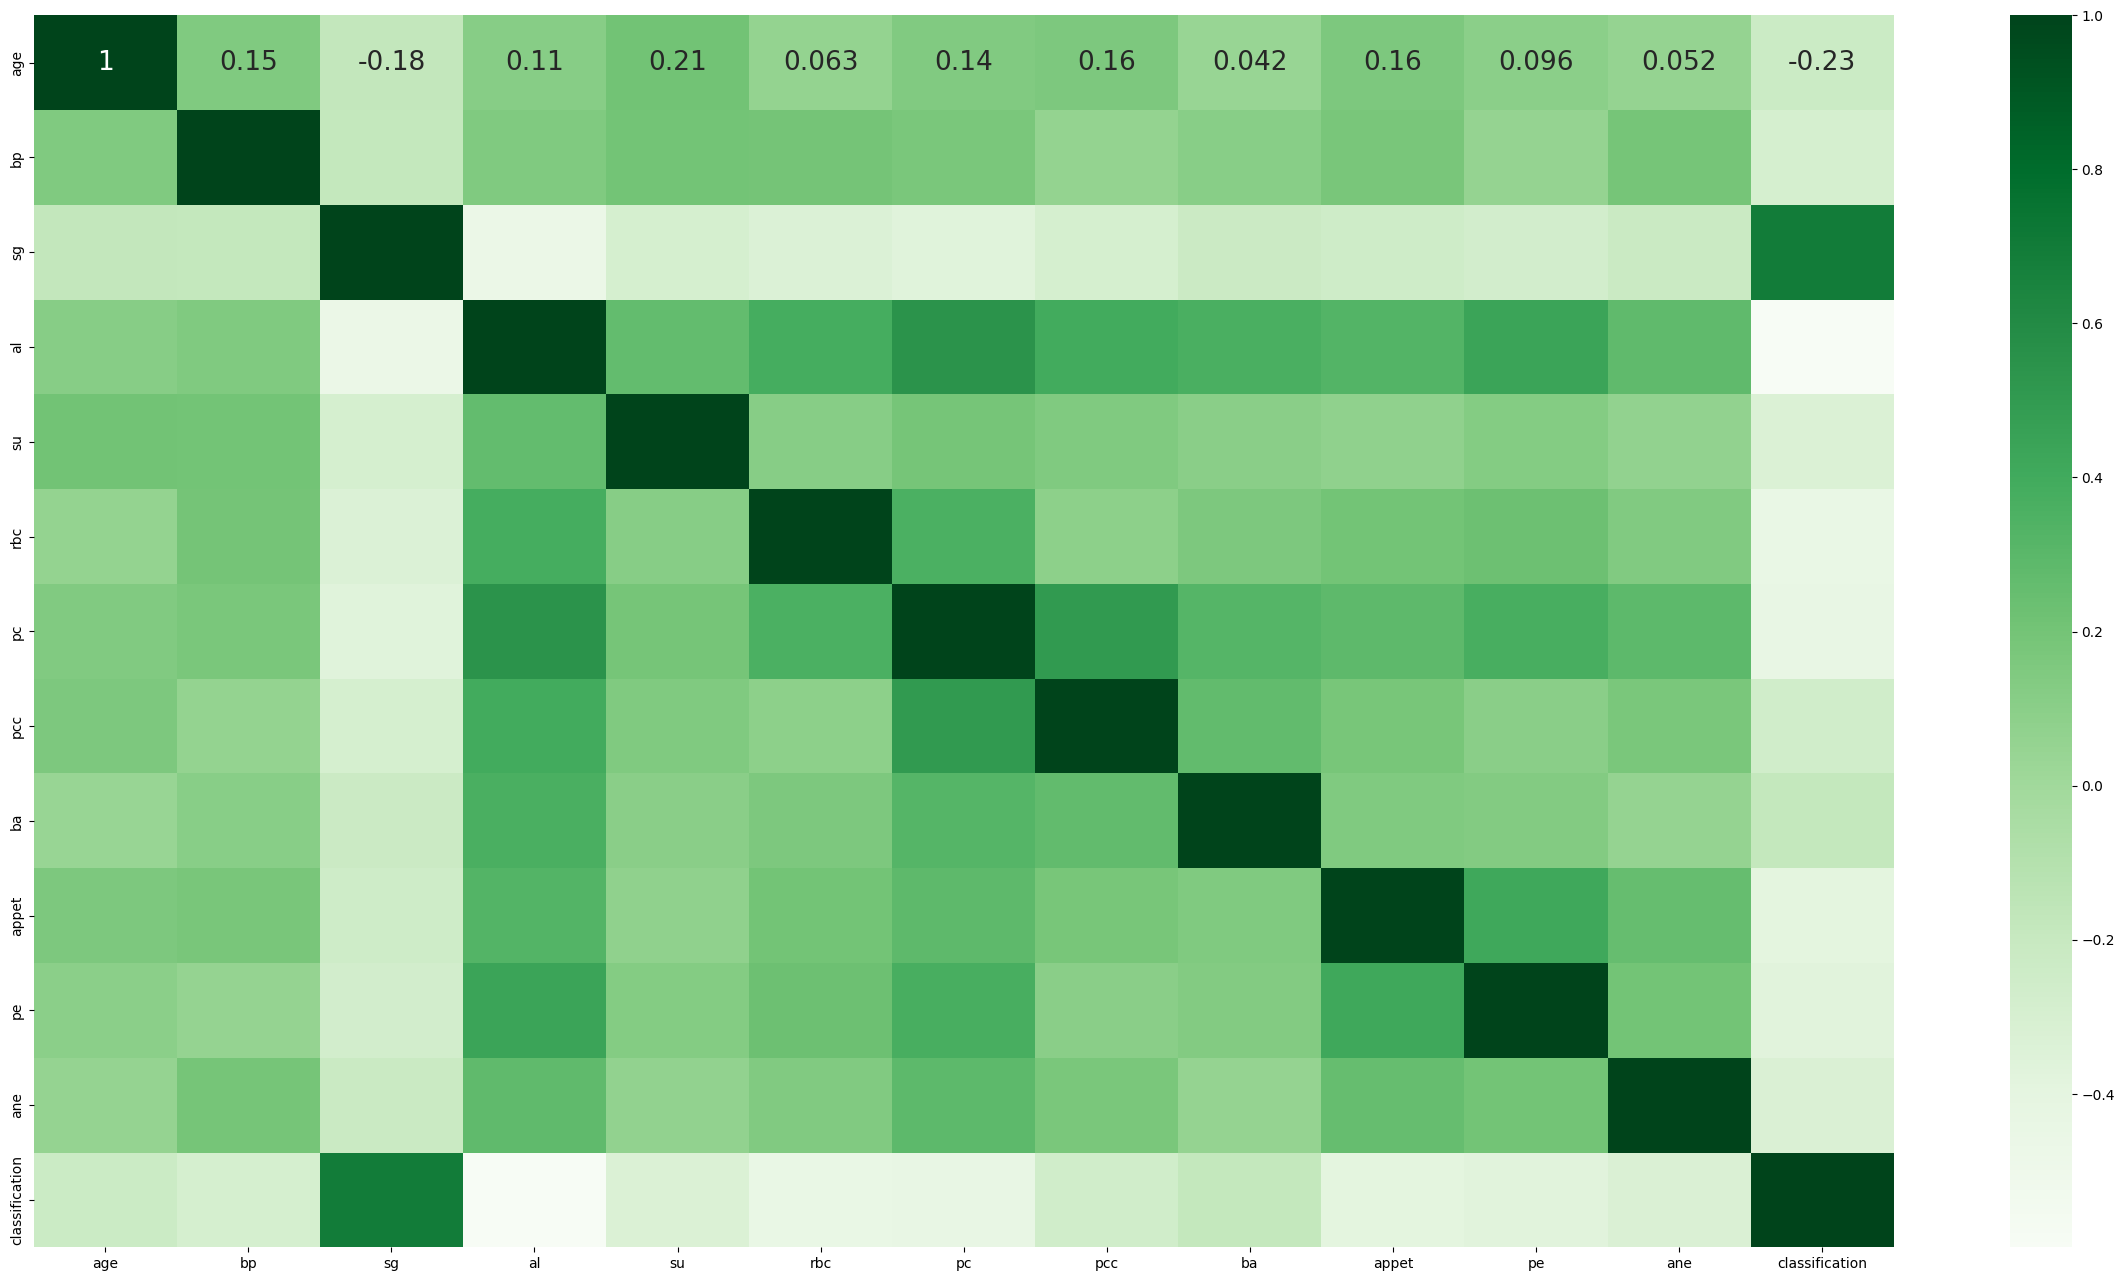

In [16]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})
plt.show()

In [17]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1596,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1597,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1598,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [18]:
X=df.drop(['classification'],axis=1)
y=df["classification"]

In [19]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.000000,1.0,1.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1596,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1597,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1598,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1280, 12) (320, 12) (1280,) (320,)


In [38]:
# Q-learning algorithm
class KidneyDiseaseEnv:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.current_state = 0  # Initialize state index

    def reset(self):
        self.current_state = 0  # Reset to initial state
        return self.current_state

    def step(self, action):
        # Perform action and observe next state and reward
        # For simplicity, let's assume the action is whether to treat (1) or not (0)
        if action == 0:  # Not treat
            reward = 0
        else:  # Treat
            reward = self.y_train.iloc[self.current_state]  # Reward based on ground truth label
        self.current_state += 1  # Move to the next state
        done = self.current_state >= len(self.X_train)  # Check if episode is done
        next_state = self.current_state if not done else None  # Next state or None if episode is done
        return next_state, reward, done


num_episodes = 1000
num_states = len(X_train)
num_actions = 2  # Treat (1) or not treat (0)
Q = np.zeros((num_states, num_actions))
alpha = 0.1  # Learning rate
gamma = 2.0  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration

env = KidneyDiseaseEnv(X_train, y_train)

# Train the RL agent
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)
        else:
            action = np.argmax(Q[state])

        # Perform action and observe reward and next state
        next_state, reward, done = env.step(action)

        # Update Q-value
        if next_state is not None:
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

        state = next_state

# Evaluate the RL agent on the test set
def choose_action(state, Q):
    return np.argmax(Q[state])

# Reset index of the test set
X_test.reset_index(drop=True, inplace=True)

# Initialize a list to store predicted actions for each state in the test set
actions_test = []

# Iterate through each state in the test set
for state_index, state in X_test.iterrows():
    # Choose action using the learned Q-values
    action = choose_action(state_index, Q)
    actions_test.append(action)

# Calculate accuracy score
Q_accuracy = sum(actions_test == y_test) / len(y_test)
print("Accuracy:", Q_accuracy)

Accuracy: 0.5125


In [39]:
# QLearningAgent algorithm
class KidneyDiseaseEnv:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.current_state = 0  # Initialize state index

    def reset(self):
        self.current_state = 0  # Reset to initial state
        return self.X_train.iloc[self.current_state].values

    def step(self, action):
        # Perform action and observe next state and reward
        # For simplicity, let's assume the action is whether to treat (1) or not (0)
        if action == 0:  # Not treat
            reward = 0
        else:  # Treat
            reward = self.y_train.iloc[self.current_state]  # Reward based on ground truth label
        self.current_state += 1  # Move to the next state
        done = self.current_state >= len(self.X_train)  # Check if episode is done
        next_state = self.X_train.iloc[self.current_state].values if not done else None  # Next state or None if episode is done
        return next_state, reward, done

# Define Q-learning agent with linear function approximation
class QLearningAgent:
    def __init__(self, state_size, action_size, lr=0.01, gamma=0.9):
        self.lr = lr
        self.gamma = gamma
        self.action_size = action_size
        self.scaler = StandardScaler(with_std=False)
        self.model = SGDRegressor(learning_rate='constant', eta0=self.lr)
        self.state_size = state_size
        self.is_fitted = False

    def act(self, state):
        if not self.is_fitted:
            raise RuntimeError("Agent is not fitted. Call fit() before act().")
        state_scaled = self.scaler.transform(state.reshape(1, -1))
        q_values = self.model.predict(state_scaled)
        return np.argmax(q_values)

    def update(self, state, action, reward, next_state):
        state_scaled = self.scaler.transform(state.reshape(1, -1))
        next_state_scaled = self.scaler.transform(next_state.reshape(1, -1))
        next_q_values = self.model.predict(next_state_scaled)
        target = reward + self.gamma * np.max(next_q_values)
        self.model.partial_fit(state_scaled, [target])
        self.is_fitted = True

    def fit(self, X, y):
        self.scaler.fit(X)
        X_scaled = self.scaler.transform(X)
        self.model.fit(X_scaled, y)
        self.is_fitted = True

# Instantiate the Q-learning agent
state_size = len(X_train.columns)
action_size = 2  # Treat (1) or not treat (0)
agent = QLearningAgent(state_size, action_size)

# Train the Q-learning agent
env = KidneyDiseaseEnv(X_train, y_train)
agent.fit(X_train, y_train)

# Evaluate the Q-learning agent on the test set
def choose_action(state, agent):
    return agent.act(state)

# Initialize a list to store predicted actions for each state in the test set
actions_test = []

# Iterate through each state in the test set
for state_index, state in X_test.iterrows():
    # Choose action using the learned Q-values
    action = choose_action(np.array(state), agent)
    actions_test.append(action)

# Calculate accuracy score
QA_accuracy = sum(np.array(actions_test).flatten() == y_test) / len(y_test)
print("Accuracy:", QA_accuracy)


Accuracy: 0.6125


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)

ValueError: Name tf.RaggedTensorSpec has already been registered for class tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec.

In [ ]:
import matplotlib.pyplot as plt
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("final_model.h5")

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
Q = round(Q_accuracy * 100)
QA=round(QA_accuracy * 100)
# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [Q, QA, 93]
labels = [f'Q-learning \n [ {Q}% ]', f'\n QLearningAgent \n [ {QA}% ]', 'ANN \n [ 93% ]']
explode = [0, 0,0.1] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})


plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [ ]:
input_data = np.array([[58.0, 80.0, 1.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
predictions = loaded_model.predict(input_data)
Result = np.round(predictions).astype(int)
if Result==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')

In [ ]:
input_data = np.array([[48.0,80.0,1.020,1.0,0.0,0.189516,0.0,0.0,0.0,0.0,0.0,0.0]])
predictions = loaded_model.predict(input_data)
Result = np.round(predictions).astype(int)
if Result==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')

In [ ]:
input_data = np.array([[62.0,80.0,1.010,2.0,3.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0]])
predictions = loaded_model.predict(input_data)
Result = np.round(predictions).astype(int)
if Result==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')

In [ ]:
input_data = np.array([[17.0,60.0,1.025,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0]])
predictions = loaded_model.predict(input_data)
Result = np.round(predictions).astype(int)
if Result==1:
   print('Output : ', 'Chronic Kidney Disease')
else:
   print('Output : ', 'Healthy')